In [1]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")

# 1) Carregamento dos Dados

In [2]:
df = pd.read_csv("life_expectancy.csv")

In [3]:
df.shape

(2848, 18)

In [4]:
df.dtypes

Country                  object
Year                      int64
Status                   object
Population              float64
Hepatitis B             float64
Measles                   int64
Polio                   float64
Diphtheria              float64
HIV/AIDS                float64
infant deaths             int64
under-five deaths         int64
Total expenditure       float64
GDP                     float64
BMI                     float64
thinness  1-19 years    float64
Alcohol                 float64
Schooling               float64
Life expectancy         float64
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2848 entries, 0 to 2847
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Country               2848 non-null   object 
 1   Year                  2848 non-null   int64  
 2   Status                2848 non-null   object 
 3   Population            2204 non-null   float64
 4   Hepatitis B           2306 non-null   float64
 5   Measles               2848 non-null   int64  
 6   Polio                 2829 non-null   float64
 7   Diphtheria            2829 non-null   float64
 8   HIV/AIDS              2848 non-null   float64
 9   infant deaths         2848 non-null   int64  
 10  under-five deaths     2848 non-null   int64  
 11  Total expenditure     2627 non-null   float64
 12  GDP                   2406 non-null   float64
 13  BMI                   2816 non-null   float64
 14  thinness  1-19 years  2816 non-null   float64
 15  Alcohol              

In [6]:
df.sample(10)

,Country,Year,Status,Population,Hepatitis B,Measles,Polio,Diphtheria,HIV/AIDS,infant deaths,under-five deaths,Total expenditure,GDP,BMI,thinness 1-19 years,Alcohol,Schooling,Life expectancy
2576,Tunisia,2015,Developing,11273661.0,98.0,16,98.0,98.0,0.1,3,3,NaN,3828.915890,61.2,6.5,NaN,14.6,75.3
998,Grenada,2009,Developing,NaN,99.0,0,99.0,99.0,0.1,0,0,6.24,7395.881250,43.1,3.8,8.42,15.6,72.4
512,Chad,2015,Developing,149413.0,46.0,418,52.0,46.0,2.8,46,77,NaN,777.248751,19.1,8.5,NaN,7.3,53.1
467,Cameroon,2012,Developing,2182383.0,85.0,609,85.0,85.0,4.6,50,76,4.34,1255.648189,27.2,5.9,0.01,10.4,55.9
1085,Haiti,2002,Developing,8834733.0,NaN,0,54.0,48.0,4.8,19,26,5.47,393.163270,35.6,4.6,6.10,8.0,59.3
2529,Togo,2014,Developing,7228915.0,87.0,577,85.0,87.0,1.0,13,20,5.25,62.131849,23.7,6.6,0.01,12.0,59.7
1648,Mongolia,2015,Developing,2976877.0,99.0,20359,99.0,99.0,0.1,1,1,NaN,3944.183900,52.7,2.2,NaN,14.8,68.8
2528,Togo,2015,Developing,741682.0,88.0,20,88.0,88.0,1.0,13,20,NaN,551.138346,24.3,6.5,NaN,12.0,59.9
1761,Netherlands,2014,Developed,168658.0,92.0,140,96.0,96.0,0.1,1,1,1.90,52157.468700,61.6,1.0,0.01,18.1,81.7
694,Democratic Republic of the Congo,2009,Developing,NaN,72.0,57,78.0,72.0,1.7,238,323,5.61,NaN,18.6,1.6,2.13,NaN,56.7


# 2) Ajuste dos Dados

In [7]:
list(df.columns)

['Country',
 'Year',
 'Status',
 'Population',
 'Hepatitis B',
 'Measles',
 'Polio',
 'Diphtheria',
 'HIV/AIDS',
 'infant deaths',
 'under-five deaths',
 'Total expenditure',
 'GDP',
 'BMI',
 'thinness  1-19 years',
 'Alcohol',
 'Schooling',
 'Life expectancy']

In [8]:
df = pd.DataFrame({'country': df['Country'],
                   'life_expectancy': df['Life expectancy'],
                   'year': df['Year'],
                   'status': df['Status'],
                   'inf_death': df['infant deaths'],
                   'alcohol': df['Alcohol'],
                   'hepatitis_b': df['Hepatitis B'],
                   'measles': df['Measles'],
                   'bmi': df['BMI'],
                   'polio': df['Polio'],
                   'diphtheria': df['Diphtheria'],
                   'hiv': df['HIV/AIDS'],
                   'gdp': df['GDP'],
                   'total_expenditure': df['Total expenditure'],
                   'thinness_till19': df['thinness  1-19 years'],
                   'school': df['Schooling'],
                   'population': df['Population']})

# 3) Análise Exploratória

In [9]:
df_dict = {
    "country": "País de origem dos dados.",
    "life_expectancy": "Expectativa de vida ao nascer, em anos.",
    "year": "Ano da coleta dos dados.",
    "status": "Nível de desenvolvimento ('Desenvolvendo' para países em desenvolvimento, 'Desenvolvido' para países desenvolvidos).",
    "inf_death": "Mortalidade infantil (menos de 5 anos) por 1000 nascidos vivos.",
    "alcohol": "Consumo de álcool per capita (litros de álcool puro por ano).",
    "hepatitisB": "Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).",
    "measles": "Casos de sarampo por 1000 habitantes.",
    "bmi": "Índice de massa corporal médio da população adulta.",
    "polio": "Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).",
    "diphtheria": "Cobertura de vacinação contra difteria, tétano e coqueluche (DTP3) em crianças de 1 ano (%).",
    "hiv": "Prevalência de HIV na população adulta (%).",
    "gdp": "Produto Interno Bruto per capita (em dólares americanos).",
    "total_expenditure": "Gasto total em saúde como porcentagem do PIB.",
    "thinness_till19": "Prevalência de magreza em crianças e adolescentes (10-19 anos) (%).",
    "school": "Média de anos de escolaridade.",
    "population": "População total do país."
}


In [10]:
df_dict['country']

'País de origem dos dados.'

In [11]:
df_dict['bmi']

'Índice de massa corporal médio da população adulta.'

In [12]:
df_dict['measles']

'Casos de sarampo por 1000 habitantes.'

In [13]:
df_dict['polio']

'Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).'

In [14]:
df_dict['status']

"Nível de desenvolvimento ('Desenvolvendo' para países em desenvolvimento, 'Desenvolvido' para países desenvolvidos)."

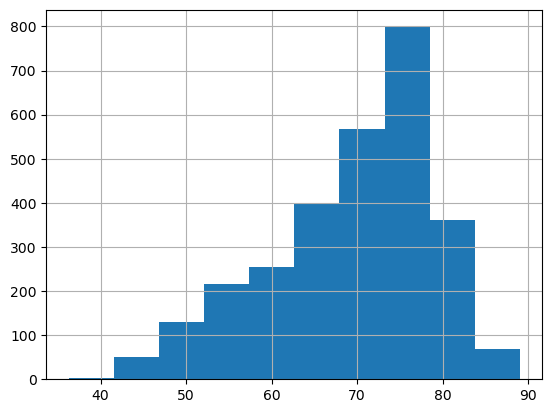

In [15]:
df['life_expectancy'].hist();

In [16]:
df.describe()

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population
count,2848.000000,2848.000000,2848.000000,2660.000000,2306.000000,2848.000000,2816.000000,2829.000000,2829.000000,2848.000000,2406.000000,2627.000000,2816.000000,2688.000000,2.204000e+03
mean,69.347402,2007.500000,28.359902,4.638932,81.076756,2083.082163,38.503374,82.682220,82.451396,1.756461,7664.398813,5.935577,4.847230,12.060156,1.283457e+07
std,9.528332,4.610582,117.188032,4.064721,25.019068,10249.107207,19.955485,23.434954,23.693936,5.148935,14466.241793,2.504439,4.443695,3.320160,6.196094e+07
min,36.300000,2000.000000,0.000000,0.010000,1.000000,0.000000,1.000000,3.000000,2.000000,0.100000,1.681350,0.370000,0.100000,0.000000,3.400000e+01
25%,63.500000,2003.750000,0.000000,0.930000,77.000000,0.000000,19.500000,78.000000,78.000000,0.100000,477.541713,4.240000,1.600000,10.200000,1.967585e+05
50%,72.200000,2007.500000,3.000000,3.785000,92.000000,16.000000,43.900000,93.000000,93.000000,0.100000,1841.086830,5.760000,3.300000,12.400000,1.391756e+06
75%,75.800000,2011.250000,20.000000,7.810000,97.000000,336.750000,56.200000,97.000000,97.000000,0.700000,6265.658907,7.530000,7.125000,14.300000,7.438947e+06
max,89.000000,2015.000000,1800.000000,17.870000,99.000000,212183.000000,77.600000,99.000000,99.000000,50.600000,119172.741800,17.600000,27.700000,20.700000,1.293859e+09


In [17]:
df.describe(include=['object'])

,country,status
count,2848,2848
unique,178,2
top,Afghanistan,Developing
freq,16,2352


In [18]:
def build_pairplot_graph(data,alvo,atributos,n):
    # Grupos de linhas com 3 (n) gráficos por linha
    grupos_linhas = [atributos[i:i+n] for i in range(0, len(atributos), n)]

    # Loop pelos grupos de linhas para criar cada pair plot
    for linha in grupos_linhas:
        plot = sns.pairplot(x_vars = linha, y_vars = alvo, data = data, kind = "reg", height = 3)

    return

In [19]:
alvo = ['life_expectancy']

In [20]:
atributos = ['population', 'hepatitis_b', 'gdp', 'total_expenditure', 'alcohol', 'school','inf_death','measles','bmi',
            'polio','diphtheria','hiv','thinness_till19'] 

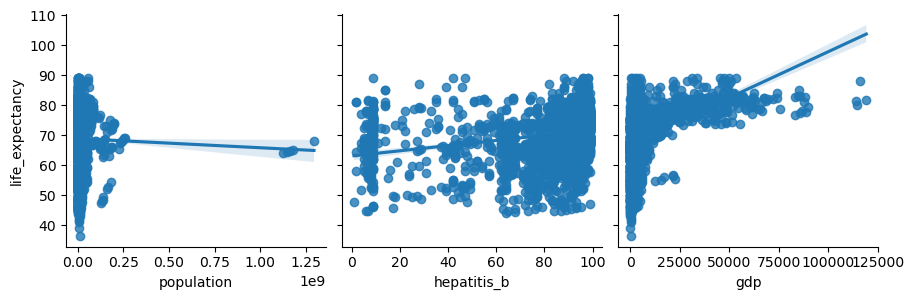

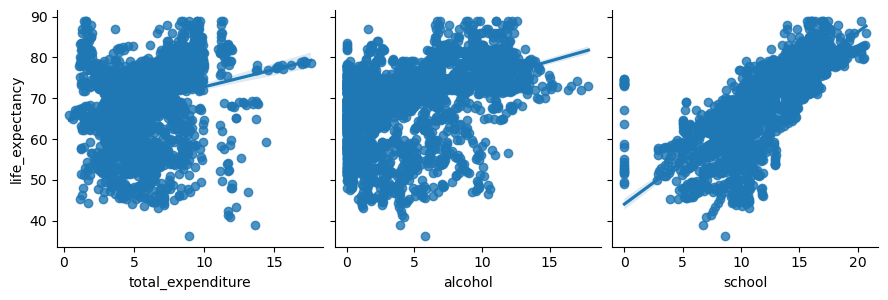

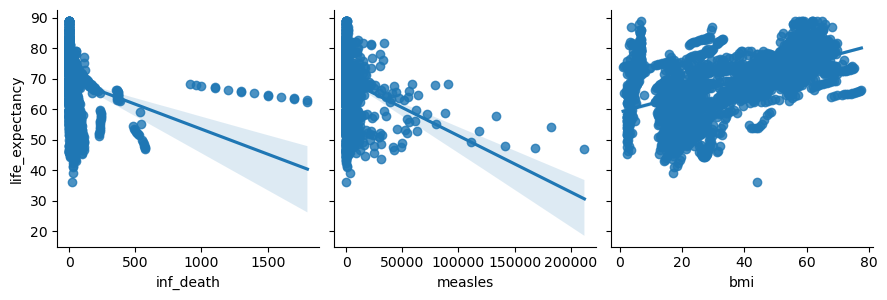

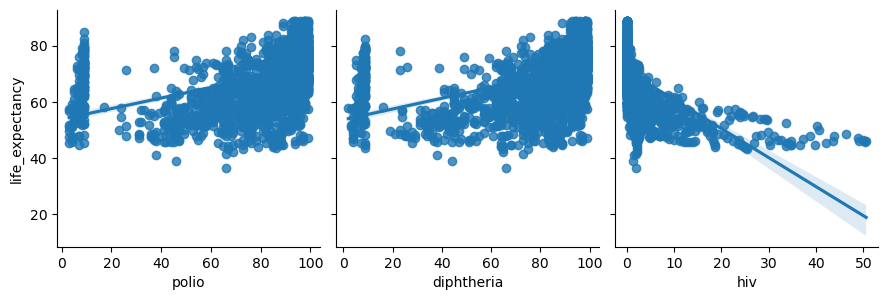

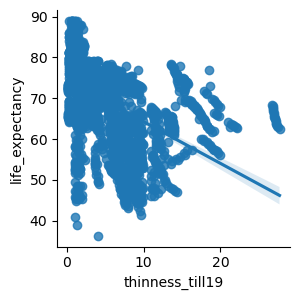

In [21]:
build_pairplot_graph(df, alvo, atributos, 3)

## 3.1) Tratando Valores Ausentes e Outliers

In [22]:
valores_ausentes = df.isnull().sum().sort_values(ascending = False)
valores_ausentes

population           644
hepatitis_b          542
gdp                  442
total_expenditure    221
alcohol              188
school               160
thinness_till19       32
bmi                   32
polio                 19
diphtheria            19
life_expectancy        0
hiv                    0
measles                0
inf_death              0
status                 0
year                   0
country                0
dtype: int64

In [23]:
valores_ausentes_percentual = valores_ausentes[valores_ausentes > 0] / df.shape[0] * 100
valores_ausentes_percentual

population           22.612360
hepatitis_b          19.030899
gdp                  15.519663
total_expenditure     7.759831
alcohol               6.601124
school                5.617978
thinness_till19       1.123596
bmi                   1.123596
polio                 0.667135
diphtheria            0.667135
dtype: float64

### Detectando os Outliers

In [24]:
atributos = ['population', 'hepatitis_b','gdp','total_expenditure','alcohol','school']

novo_dataframe = df[atributos]
novo_dataframe.head()

,population,hepatitis_b,gdp,total_expenditure,alcohol,school
0,33736494.0,65.0,584.259210,8.16,0.01,10.1
1,327582.0,62.0,612.696514,8.18,0.01,10.0
2,31731688.0,64.0,631.744976,8.13,0.01,9.9
3,3696958.0,67.0,669.959000,8.52,0.01,9.8
4,2978599.0,68.0,63.537231,7.87,0.01,9.5


In [25]:
#Identificação dos Outliers através do método do IQR

q1 = novo_dataframe.quantile(0.25)
q3 = novo_dataframe.quantile(0.75)
iqr = q3 - q1

In [26]:
outliers = ((novo_dataframe < (q1 - 1.5 * iqr)) | (novo_dataframe > (q3 + 1.5 * iqr))).sum()

In [27]:
fix_outliers = (q1 - 1.5 * iqr) + (q3 + 1.5 * iqr)
fix_outliers

population           7.635706e+06
hepatitis_b          1.740000e+02
gdp                  6.743201e+03
total_expenditure    1.177000e+01
alcohol              8.740000e+00
school               2.450000e+01
dtype: float64

In [28]:
outliers

population           285
hepatitis_b          247
gdp                  344
total_expenditure     30
alcohol                0
school                50
dtype: int64

In [29]:
outliers_sumario = pd.DataFrame({'Outliers':outliers,
                                 'Percentual': (outliers / len(novo_dataframe)) * 100})
outliers_sumario[outliers_sumario['Outliers'] > 0]

,Outliers,Percentual
population,285,10.007022
hepatitis_b,247,8.672753
gdp,344,12.078652
total_expenditure,30,1.053371
school,50,1.755618


In [30]:
# Definindo os limites para filtrar os outliers
limite_inferior = q1 - 1.5 * iqr
limite_superior = q3 + 1.5 * iqr

In [31]:
novo_df = df[~((novo_dataframe < limite_inferior) | (novo_dataframe > limite_superior)).any(axis=1)]

In [32]:
novo_df.shape

(1984, 17)

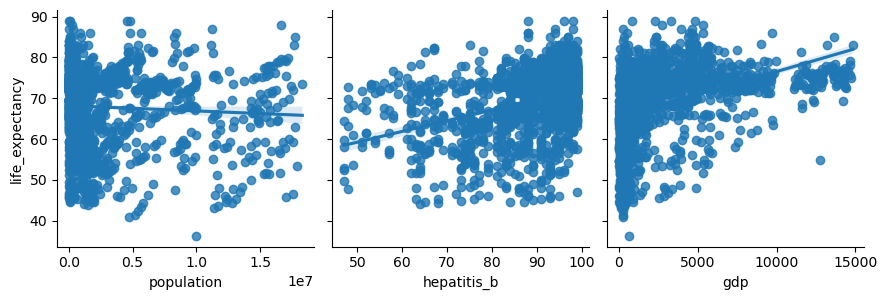

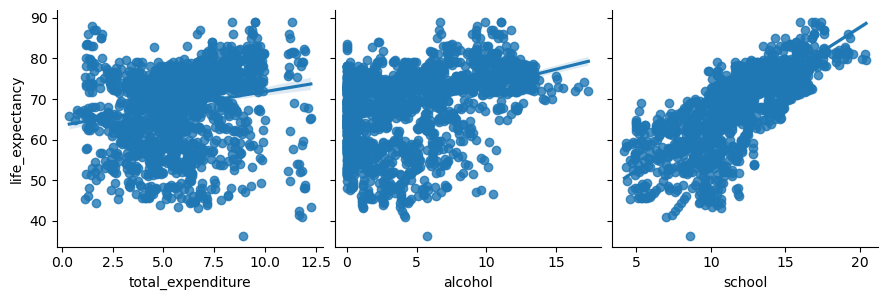

In [33]:
build_pairplot_graph(novo_df,alvo,atributos, 3)

### Tratando os Valores Ausentes

In [34]:
valores_ausentes_percentual

population           22.612360
hepatitis_b          19.030899
gdp                  15.519663
total_expenditure     7.759831
alcohol               6.601124
school                5.617978
thinness_till19       1.123596
bmi                   1.123596
polio                 0.667135
diphtheria            0.667135
dtype: float64

In [35]:
def set_median(dados):
    return dados.fillna(dados.median())

In [36]:
novo_df.describe()

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population
count,1984.000000,1984.000000,1984.000000,1853.000000,1606.000000,1984.000000,1974.000000,1981.000000,1981.000000,1984.000000,1614.000000,1827.000000,1974.000000,1853.000000,1.493000e+03
mean,68.480393,2007.512097,18.889617,4.319390,88.746575,1600.379536,37.545238,83.640586,84.411913,1.911996,2768.003306,5.819535,4.965755,11.891473,2.869779e+06
std,9.145027,4.624024,72.883845,3.873894,11.448377,9399.913772,19.483693,22.342243,20.778168,5.426506,3273.176065,2.183378,4.082973,2.830664,4.191358e+06
min,36.300000,2000.000000,0.000000,0.010000,47.000000,0.000000,1.000000,3.000000,3.000000,0.100000,3.685949,0.370000,0.100000,4.200000,3.400000e+01
25%,63.000000,2003.000000,0.000000,0.910000,84.000000,0.000000,19.500000,79.000000,81.000000,0.100000,420.155713,4.340000,1.900000,10.300000,1.486210e+05
50%,71.600000,2008.000000,3.000000,3.450000,93.000000,9.000000,42.150000,93.000000,93.000000,0.100000,1391.794624,5.720000,3.500000,12.100000,9.159320e+05
75%,74.725000,2011.250000,16.000000,6.880000,97.000000,221.250000,55.000000,97.000000,97.000000,0.900000,4129.098493,7.175000,7.300000,13.800000,3.643222e+06
max,89.000000,2015.000000,1800.000000,17.310000,99.000000,212183.000000,77.600000,99.000000,99.000000,50.300000,14817.377780,12.250000,27.700000,20.400000,1.829461e+07


In [37]:
novo_df.loc[:,'population'] = novo_df['population'].transform(set_median)
novo_df.hepatitisB = novo_df['hepatitis_b'].transform(set_median)
novo_df.alcohol = novo_df['alcohol'].transform(set_median)
novo_df.total_expenditure = novo_df['total_expenditure'].transform(set_median)
novo_df.gdp = novo_df['gdp'].transform(set_median)
novo_df.school = novo_df['school'].transform(set_median)

In [38]:
novo_df.dropna(inplace = True)

In [39]:
valores_ausentes = novo_df.isnull().sum().sort_values(ascending = False)

In [40]:
valores_ausentes_percent = valores_ausentes[valores_ausentes > 0] / novo_df.shape[0] 
valores_ausentes_percent

Series([], dtype: float64)

In [41]:
novo_df.drop(['country', 'status'], axis = 1, inplace = True)

# 4) Feature Engineering

In [42]:
#Criar uma nova variavel que categorize a população dos países

In [43]:
novo_df.head()

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population
1,59.9,2014,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,10.0,327582.0
3,59.5,2012,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,9.8,3696958.0
4,59.2,2011,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,9.5,2978599.0
5,58.8,2010,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,9.2,2883167.0
6,58.6,2009,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,8.9,284331.0


In [44]:
novo_df.population.max()

18294611.0

In [45]:
novo_df.population.min()

34.0

In [46]:
novo_df.population.mean()

2346926.133911416

In [47]:
pontos_corte = [novo_df.population.quantile(0.30), novo_df.population.quantile(0.60)]

In [48]:
pontos_corte

[529998.1999999998, 915932.0]

In [49]:

novo_df['pop_size'] = 1

novo_df.loc[(novo_df.population < pontos_corte[1]) & (novo_df.population > pontos_corte[0]), 'pop_size'] = 2

novo_df.loc[novo_df.population >= pontos_corte[1], 'pop_size'] = 3

In [50]:
novo_df.head()

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population,pop_size
1,59.9,2014,64,0.01,62.0,492,18.6,58.0,62.0,0.1,612.696514,8.18,17.5,10.0,327582.0,1
3,59.5,2012,69,0.01,67.0,2787,17.6,67.0,67.0,0.1,669.959000,8.52,17.9,9.8,3696958.0,3
4,59.2,2011,71,0.01,68.0,3013,17.2,68.0,68.0,0.1,63.537231,7.87,18.2,9.5,2978599.0,3
5,58.8,2010,74,0.01,66.0,1989,16.7,66.0,66.0,0.1,553.328940,9.20,18.4,9.2,2883167.0,3
6,58.6,2009,77,0.01,63.0,2861,16.2,63.0,63.0,0.1,445.893298,9.42,18.6,8.9,284331.0,1


In [53]:
novo_df['lifestyle'] = 0
novo_df.lifestyle = novo_df['bmi'] * novo_df['alcohol']

In [54]:
missing_values = novo_df.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy      0
hiv                  0
pop_size             0
population           0
school               0
thinness_till19      0
total_expenditure    0
gdp                  0
diphtheria           0
year                 0
polio                0
bmi                  0
measles              0
hepatitis_b          0
alcohol              0
inf_death            0
lifestyle            0
dtype: int64

# 5) Análise de Correlação e Multicolinearidade

In [55]:
novo_df.corr()

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population,pop_size,lifestyle
life_expectancy,1.000000,0.073827,-0.298274,0.296012,0.378710,-0.113996,0.497611,0.309002,0.321869,-0.593623,0.317243,0.126008,-0.404738,0.646628,-0.073160,-0.016918,0.383852
year,0.073827,1.000000,0.019904,-0.091072,0.070007,0.004070,0.000156,-0.013292,0.070923,-0.118865,0.112203,0.053972,0.013832,0.105409,0.054479,0.032056,-0.055277
inf_death,-0.298274,0.019904,1.000000,-0.161051,-0.255615,0.390480,-0.251178,-0.209411,-0.199533,0.078671,-0.140554,-0.106680,0.292172,-0.272507,0.142602,0.134824,-0.185231
alcohol,0.296012,-0.091072,-0.161051,1.000000,0.194109,-0.046979,0.245761,0.153236,0.170808,-0.013513,0.287283,0.220837,-0.380072,0.460118,0.022934,0.065554,0.872659
hepatitis_b,0.378710,0.070007,-0.255615,0.194109,1.000000,-0.101794,0.168796,0.569340,0.656190,-0.128996,0.197621,0.045924,-0.131129,0.357242,-0.061295,0.052585,0.195004
measles,-0.113996,0.004070,0.390480,-0.046979,-0.101794,1.000000,-0.112254,-0.052466,-0.067738,0.026616,-0.054484,-0.071747,0.088507,-0.061272,0.019280,0.065118,-0.063431
bmi,0.497611,0.000156,-0.251178,0.245761,0.168796,-0.112254,1.000000,0.131855,0.124734,-0.210990,0.263637,0.143926,-0.524391,0.509020,-0.047797,-0.011582,0.548969
polio,0.309002,-0.013292,-0.209411,0.153236,0.569340,-0.052466,0.131855,1.000000,0.518572,-0.094187,0.140081,0.066189,-0.081914,0.287308,-0.039359,0.038676,0.157188
diphtheria,0.321869,0.070923,-0.199533,0.170808,0.656190,-0.067738,0.124734,0.518572,1.000000,-0.108438,0.170141,0.079684,-0.101607,0.328110,-0.041951,0.028966,0.156508
hiv,-0.593623,-0.118865,0.078671,-0.013513,-0.128996,0.026616,-0.210990,-0.094187,-0.108438,1.000000,-0.096116,0.037664,0.170955,-0.208982,0.048690,-0.024306,-0.097678


In [56]:
dfCorr = novo_df.corr()
df_filtro_1 = dfCorr[((dfCorr >= 0.3) | (dfCorr <= -0.3)) & (dfCorr != 1.000)]
df_filtro_1

,life_expectancy,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population,pop_size,lifestyle
life_expectancy,NaN,NaN,NaN,NaN,0.378710,NaN,0.497611,0.309002,0.321869,-0.593623,0.317243,NaN,-0.404738,0.646628,NaN,NaN,0.383852
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,0.39048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.380072,0.460118,NaN,NaN,0.872659
hepatitis_b,0.378710,NaN,NaN,NaN,NaN,NaN,NaN,0.569340,0.656190,NaN,NaN,NaN,NaN,0.357242,NaN,NaN,NaN
measles,NaN,NaN,0.39048,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,0.497611,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.524391,0.509020,NaN,NaN,0.548969
polio,0.309002,NaN,NaN,NaN,0.569340,NaN,NaN,NaN,0.518572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diphtheria,0.321869,NaN,NaN,NaN,0.656190,NaN,NaN,0.518572,NaN,NaN,NaN,NaN,NaN,0.328110,NaN,NaN,NaN
hiv,-0.593623,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
dfCorr = novo_df.corr()
df_filtro_2 = dfCorr[((dfCorr >= 0.60) | (dfCorr <= -0.60)) & (dfCorr != 1.000)]
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=1)
df_filtro_2 = df_filtro_2.drop('life_expectancy', axis=0)
df_filtro_2

,year,inf_death,alcohol,hepatitis_b,measles,bmi,polio,diphtheria,hiv,gdp,total_expenditure,thinness_till19,school,population,pop_size,lifestyle
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
inf_death,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
alcohol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.872659
hepatitis_b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.65619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
measles,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
polio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
diphtheria,NaN,NaN,NaN,0.65619,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hiv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gdp,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [58]:
#hepatitis_b, bmi polio  hiv gdp thinness_till19 school lifestyle

In [60]:
df_final = pd.DataFrame({
    'life_expectancy': novo_df['life_expectancy'],
    'hepatitis_b':novo_df['hepatitis_b'],
    'polio':novo_df['polio'],
    'hiv':novo_df['hiv'],
    'gdp':novo_df['gdp'],
    'thinness_till19':novo_df['thinness_till19'],
    'school':novo_df['school'],
    'lifestyle':novo_df['lifestyle']

})

In [61]:
df_final

,life_expectancy,hepatitis_b,polio,hiv,gdp,thinness_till19,school,lifestyle
1,59.9,62.0,58.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,67.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,68.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,66.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,63.0,63.0,0.1,445.893298,18.6,8.9,0.162
...,...,...,...,...,...,...,...,...
2842,44.6,65.0,69.0,30.3,444.765750,9.0,9.3,113.850
2843,44.3,68.0,67.0,33.6,454.366654,9.4,9.2,118.156
2845,44.8,73.0,73.0,39.8,57.348340,1.2,10.0,116.509
2846,45.3,76.0,76.0,42.1,548.587312,1.6,9.8,44.548


In [62]:
df_dict['life_expectancy']

'Expectativa de vida ao nascer, em anos.'

In [65]:
df_dict['hepatitisB']

'Cobertura de vacinação contra hepatite B em crianças de 1 ano (%).'

In [67]:
df_dict['polio']

'Cobertura de vacinação contra poliomielite em crianças de 1 ano (%).'

In [68]:
df_dict['thinness_till19']

'Prevalência de magreza em crianças e adolescentes (10-19 anos) (%).'

In [69]:
df_dict['school']

'Média de anos de escolaridade.'

In [71]:
missing_values = df_final.isnull().sum().sort_values(ascending = False)
missing_values

life_expectancy    0
hepatitis_b        0
polio              0
hiv                0
gdp                0
thinness_till19    0
school             0
lifestyle          0
dtype: int64

In [72]:
df_final.count()

life_expectancy    1603
hepatitis_b        1603
polio              1603
hiv                1603
gdp                1603
thinness_till19    1603
school             1603
lifestyle          1603
dtype: int64

In [76]:
corr_map = df_final.corr()
corr_map

,life_expectancy,hepatitis_b,polio,hiv,gdp,thinness_till19,school,lifestyle
life_expectancy,1.000000,0.378710,0.309002,-0.593623,0.317243,-0.404738,0.646628,0.383852
hepatitis_b,0.378710,1.000000,0.569340,-0.128996,0.197621,-0.131129,0.357242,0.195004
polio,0.309002,0.569340,1.000000,-0.094187,0.140081,-0.081914,0.287308,0.157188
hiv,-0.593623,-0.128996,-0.094187,1.000000,-0.096116,0.170955,-0.208982,-0.097678
gdp,0.317243,0.197621,0.140081,-0.096116,1.000000,-0.183912,0.429646,0.309949
thinness_till19,-0.404738,-0.131129,-0.081914,0.170955,-0.183912,1.000000,-0.443496,-0.435587
school,0.646628,0.357242,0.287308,-0.208982,0.429646,-0.443496,1.000000,0.511752
lifestyle,0.383852,0.195004,0.157188,-0.097678,0.309949,-0.435587,0.511752,1.000000


# 6) Modelagem Estatística

In [83]:
formula = 'life_expectancy ~  hepatitis_b + polio + hiv + gdp + thinness_till19 + school + lifestyle'

In [84]:
modelo_v1 = ols(formula, data = df_final).fit()

In [87]:
print(f"R-squared: {modelo_v1.rsquared}")


R-squared: 0.6695283775085832


In [88]:
print(f"Coeficientes:\n{modelo_v1.params}")

Coeficientes:
Intercept          45.644900
hepatitis_b         0.073055
polio               0.028012
hiv                -0.684783
gdp                 0.000088
thinness_till19    -0.198477
school              1.354638
lifestyle           0.001670
dtype: float64


In [89]:
modelo_v1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.670
Model:                            OLS   Adj. R-squared:                  0.668
Method:                 Least Squares   F-statistic:                     461.6
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:21:00   Log-Likelihood:                -4710.1
No. Observations:                1603   AIC:                             9436.
Df Residuals:                    1595   BIC:                             9479.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          45.6449      1.063     42.928      0.000      43.559      47.731
hepatitis_b         0.0731      0.013      5.810      0.000       0.048       0.098
polio               0.0280      0.007      3.818      0.000       0.014       0.042
hiv                -0.6848      0.022    -31.255      0.000      -0.728      -0.642
gdp                8.8e-05    4.2e-05      2.097      0.036     5.7e-06       0.000
thinness_till19    -0.1985      0.034     -5.843      0.000      -0.265      -0.132
school              1.3546      0.064     21.187      0.000       1.229       1.480
lifestyle           0.0017      0.001      2.449      0.014       0.000       0.003
==============================================================================
Omnibus:                       58.577   Durbin-Watson:                   0.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               83.041
Skew:                          -0.356   Prob(JB):                     9.29e-19
Kurtosis:                       3.858   Cond. No.                     3.76e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.76e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [91]:
#Segunda versão do modelo 
formula = 'life_expectancy ~ hepatitis_b + polio + hiv + thinness_till19 + school'
modelo_v2 = ols(formula, data = df_final).fit()
modelo_v2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     640.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:23:59   Log-Likelihood:                -4716.1
No. Observations:                1603   AIC:                             9444.
Df Residuals:                    1597   BIC:                             9476.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          44.8859      1.041     43.113      0.000      42.844      46.928
hepatitis_b         0.0748      0.013      5.938      0.000       0.050       0.100
polio               0.0282      0.007      3.830      0.000       0.014       0.043
hiv                -0.6829      0.022    -31.099      0.000      -0.726      -0.640
thinness_till19    -0.2209      0.033     -6.749      0.000      -0.285      -0.157
school              1.4557      0.057     25.570      0.000       1.344       1.567
==============================================================================
Omnibus:                       63.912   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.164
Skew:                          -0.375   Prob(JB):                     9.70e-21
Kurtosis:                       3.904   Cond. No.                     1.15e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.15e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [92]:
df_final

,life_expectancy,hepatitis_b,polio,hiv,gdp,thinness_till19,school,lifestyle
1,59.9,62.0,58.0,0.1,612.696514,17.5,10.0,0.186
3,59.5,67.0,67.0,0.1,669.959000,17.9,9.8,0.176
4,59.2,68.0,68.0,0.1,63.537231,18.2,9.5,0.172
5,58.8,66.0,66.0,0.1,553.328940,18.4,9.2,0.167
6,58.6,63.0,63.0,0.1,445.893298,18.6,8.9,0.162
...,...,...,...,...,...,...,...,...
2842,44.6,65.0,69.0,30.3,444.765750,9.0,9.3,113.850
2843,44.3,68.0,67.0,33.6,454.366654,9.4,9.2,118.156
2845,44.8,73.0,73.0,39.8,57.348340,1.2,10.0,116.509
2846,45.3,76.0,76.0,42.1,548.587312,1.6,9.8,44.548


In [93]:
#Padronização dos Dados

atributos = ['hepatitis_b', 'polio', 'hiv', 'thinness_till19', 'school']
scaler = StandardScaler()
scaler.fit(df_final[atributos])
scaled_features = scaler.transform(df_final[atributos])

In [94]:
scaled_features_df = pd.DataFrame(scaled_features, columns = atributos, index = df_final.index)
scaled_features_df.head()

,hepatitis_b,polio,hiv,thinness_till19,school
1,-2.337042,-1.514084,-0.284683,3.215405,-0.881160
3,-1.900250,-1.043041,-0.284683,3.317102,-0.963721
4,-1.812891,-0.990703,-0.284683,3.393375,-1.087563
5,-1.987608,-1.095379,-0.284683,3.444224,-1.211404
6,-2.249683,-1.252393,-0.284683,3.495072,-1.335246


In [95]:
modelo_v3 = sm.OLS(endog = df_final['life_expectancy'],
                  exog = sm.add_constant(scaled_features_df.values)).fit()

In [96]:
modelo_v3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        life_expectancy   R-squared:                       0.667
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     640.0
Date:                Sun, 23 Jun 2024   Prob (F-statistic):               0.00
Time:                        14:30:09   Log-Likelihood:                -4716.1
No. Observations:                1603   AIC:                             9444.
Df Residuals:                    1597   BIC:                             9476.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4535      0.115    605.176      0.000      69.228      69.679
x1             0.8563      0.144      5.938      0.000       0.573       1.139
x2             0.5384      0.141      3.830      0.000       0.263       0.814
x3            -3.6718      0.118    -31.099      0.000      -3.903      -3.440
x4            -0.8690      0.129     -6.749      0.000      -1.122      -0.616
x5             3.5265      0.138     25.570      0.000       3.256       3.797
==============================================================================
Omnibus:                       63.912   Durbin-Watson:                   0.331
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.164
Skew:                          -0.375   Prob(JB):                     9.70e-21
Kurtosis:                       3.904   Cond. No.                         2.20
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
modelo_v3.rsquared.round(2)

0.67